In [1]:
import pandas as pd
import plotnine
import geopandas as gpd
%matplotlib inline
from shapely.geometry import Point

In [2]:
pwd!

'/Users/markhyun/Desktop/HealthandSpaceLab/TRDRP/TobaccoFiles'

In [3]:
TobaccoLocations = pd.read_csv('/Users/markhyun/Desktop/GIS/TRDRP/TobaccoShops_Files /Data/CSV/TobaccoSHP.csv')

FileNotFoundError: [Errno 2] File /Users/markhyun/Desktop/GIS/TRDRP/TobaccoShops_Files /Data/CSV/TobaccoSHP.csv does not exist: '/Users/markhyun/Desktop/GIS/TRDRP/TobaccoShops_Files /Data/CSV/TobaccoSHP.csv'

In [6]:
TobaccoLicsenses = pd.read_csv('/Users/markhyun/Desktop/HealthandSpaceLab/TRDRP/TobaccoFiles/Data/CSV/TobaccoShopsAndLicsenses_SHP.csv')

In [41]:
South_LA_Cities = []

In [42]:
TobaccoLocations.head()
TobaccoLocations.info()
TobaccoLocations.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 94 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Loc_name    513 non-null    object 
 1   Status      516 non-null    object 
 2   Score       516 non-null    float64
 3   Match_type  516 non-null    object 
 4   Match_addr  513 non-null    object 
 5   LongLabel   513 non-null    object 
 6   ShortLabel  513 non-null    object 
 7   Addr_type   513 non-null    object 
 8   Type        0 non-null      float64
 9   PlaceName   1 non-null      float64
 10  Place_addr  513 non-null    object 
 11  Phone       0 non-null      float64
 12  URL         0 non-null      float64
 13  Rank        516 non-null    float64
 14  AddBldg     0 non-null      float64
 15  AddNum      510 non-null    object 
 16  AddNumFrom  83 non-null     float64
 17  AddNumTo    83 non-null     float64
 18  AddRange    83 non-null     object 
 19  Side        84 non-null     o

Loc_name        3
Status          0
Score           0
Match_type      0
Match_addr      3
             ... 
Field22       516
Field23       516
Field24       516
Field25       516
Field26       516
Length: 94, dtype: int64

In [43]:
TobaccoLicsenses.head()
TobaccoLicsenses.info()
TobaccoLicsenses['DBA'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22691 entries, 0 to 22690
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          22691 non-null  float64
 1   Y          22691 non-null  float64
 2   License__  22175 non-null  float64
 3   Owner      22636 non-null  object 
 4   DBA        22546 non-null  object 
 5   Address    22687 non-null  object 
 6   City_1     22686 non-null  object 
 7   State      22686 non-null  object 
 8   Zip        22175 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


145

In [44]:
#Isolating the features we want from each file.
TobaccoLicsenses_DF = TobaccoLicsenses[['X','Y', 'DBA']]
TobaccoLocations_DF = TobaccoLocations[['X','Y', 'DBA']]

In [45]:
#MUST DO THIS BEFORE RUNNING CODE BELOW#concat shops and liscences (x,y coords, doing bus name (DBA), Business name *rename so that both csv columns have the same busname in columnname)
#AFTER concat save as csv in the output folder
#ad it to south la shp
combined = pd.concat([TobaccoLicsenses_DF, TobaccoLocations_DF], axis=0) #axis 0 = row bind / axis 1 = column bind
#merged_inner = pd.merge(TobaccoLocations_DF,TobaccoLicsenses_DF, how = 'left', on=['DBA'])
combined.info()
combined.isnull().sum()
#merged_inner_dups = merged_inner[merged_inner.duplicated(['DBA'])]
#print(merged_inner_dups)
#merged_inner.tail

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23207 entries, 0 to 515
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       23207 non-null  float64
 1   Y       23207 non-null  float64
 2   DBA     23047 non-null  object 
dtypes: float64(2), object(1)
memory usage: 725.2+ KB


X        0
Y        0
DBA    160
dtype: int64

In [46]:
combined['DBA'].fillna('Missing Name', inplace = True)

In [47]:
combined.isnull().sum()


X      0
Y      0
DBA    0
dtype: int64

In [48]:
(combined.DBA =='Missing Name').sum()

160

In [49]:
combined.to_csv('Output/CSV/mergedTobacco.csv', sep=',', encoding='utf-8', index = 'False')


In [88]:
southLA=gpd.read_file('Data/SHP/South_LA/SLA_Tracts.shp')
tobaccoShops= pd.read_csv('Output/CSV/mergedTobacco.csv')

southLA.drop('geometry',axis=1).to_csv('Output/SHP/SouthLA_TractSHP.csv', index = False)

In [100]:
tobaccoshops_gdf = gpd.GeoDataFrame(tobaccoShops,geometry = gpd.points_from_xy(combined['X'],combined['Y']), crs = 'EPSG:4269')
tobaccoshops_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

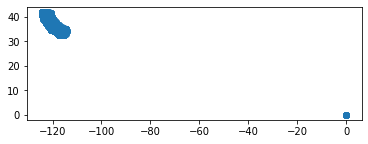

In [101]:
mergedTobacco_gdf.plot()

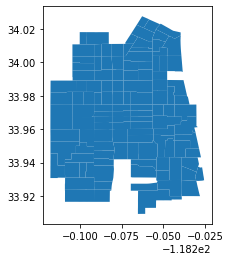

In [111]:
southLA.plot()

In [112]:
southLA.head

<bound method NDFrame.head of      OBJECTID STATEFP COUNTYFP TRACTCE        GEOID     NAME  \
0           1      06      037  237201  06037237201  2372.01   
1           2      06      037  239201  06037239201  2392.01   
2           3      06      037  239601  06037239601  2396.01   
3           4      06      037  237300  06037237300     2373   
4           5      06      037  227010  06037227010  2270.10   
..        ...     ...      ...     ...          ...      ...   
113       114      06      037  533002  06037533002  5330.02   
114       115      06      037  535002  06037535002  5350.02   
115       116      06      037  242000  06037242000     2420   
116       117      06      037  232120  06037232120  2321.20   
117       118      06      037  532700  06037532700     5327   

                 NAMELSAD  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT  \
0    Census Tract 2372.01  G5020        S  453406.0     0.0  +33.9857256   
1    Census Tract 2392.01  G5020        S  449869

In [113]:
southLA.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [114]:
tobaccoshops_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [117]:
tobaccoShops_within_SLA = gpd.sjoin(tobaccoshops_gdf,southLA, how = 'inner', op = 'within')

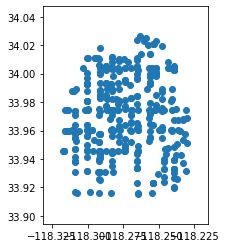

In [118]:
tobaccoShops_within_SLA.plot()

In [107]:
tobaccoShops_within_SLA.head()

,Unnamed: 0,X,Y,DBA,geometry,index_right,OBJECTID,STATEFP,COUNTYFP,TRACTCE,...,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area
11,11,-118.265225,33.979012,EL MEXICANO MARKET,POINT (-118.26522 33.97901),75,76,06,037,239330,...,2393.30,Census Tract 2393.30,G5020,S,979523.0,0.0,+33.9783876,-118.2631028,0.041296,0.000096
13582,13582,-118.268993,33.974727,7-ELEVEN #36961A,POINT (-118.26899 33.97473),75,76,06,037,239330,...,2393.30,Census Tract 2393.30,G5020,S,979523.0,0.0,+33.9783876,-118.2631028,0.041296,0.000096
274,274,-118.282709,34.004839,RITE AID #5445,POINT (-118.28271 34.00484),37,38,06,037,231720,...,2317.20,Census Tract 2317.20,G5020,S,472239.0,0.0,+34.0074463,-118.2840710,0.027148,0.000046
5780,5780,-118.282721,34.010682,CHEVRON STATIONS INC. #1864,POINT (-118.28272 34.01068),37,38,06,037,231720,...,2317.20,Census Tract 2317.20,G5020,S,472239.0,0.0,+34.0074463,-118.2840710,0.027148,0.000046
12410,12410,-118.282762,34.008035,BESTWAY LIQUOR,POINT (-118.28276 34.00804),37,38,06,037,231720,...,2317.20,Census Tract 2317.20,G5020,S,472239.0,0.0,+34.0074463,-118.2840710,0.027148,0.000046


In [119]:
tobaccoShops_within_SLA.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [121]:
tobaccoShops_within_SLA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 376 entries, 11 to 22983
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   376 non-null    int64   
 1   X            376 non-null    float64 
 2   Y            376 non-null    float64 
 3   DBA          376 non-null    object  
 4   geometry     376 non-null    geometry
 5   index_right  376 non-null    int64   
 6   OBJECTID     376 non-null    int64   
 7   STATEFP      376 non-null    object  
 8   COUNTYFP     376 non-null    object  
 9   TRACTCE      376 non-null    object  
 10  GEOID        376 non-null    object  
 11  NAME         376 non-null    object  
 12  NAMELSAD     376 non-null    object  
 13  MTFCC        376 non-null    object  
 14  FUNCSTAT     376 non-null    object  
 15  ALAND        376 non-null    float64 
 16  AWATER       376 non-null    float64 
 17  INTPTLAT     376 non-null    object  
 18  INTPTLON     376 no

In [122]:
tobaccoShops_within_SLA.to_csv('Output/CSV/tobaccoShops_within_SLA.csv', sep=',', encoding='utf-8', index = 'False')
